1. Loading CSV data...
✓ Loaded CSV data with 476 rows and 14 columns

2. Basic statistics...
DataFrame shape: (476, 14)
Columns: ['channel_id', 'channel_title', 'channel_username', 'date', 'edit_date', 'file_path', 'forwards', 'media_type', 'message_id', 'replies', 'scraped_at', 'text', 'url', 'views']

Views statistics:
  Total views: 674396
  Average views: 1416.8
  Maximum views: 31097

3. Creating visualizations...
✓ Visualizations saved as 'csv_analysis.png'
✓ Sample analysis saved as 'csv_sample_analysis.json'

CSV data analysis completed successfully!


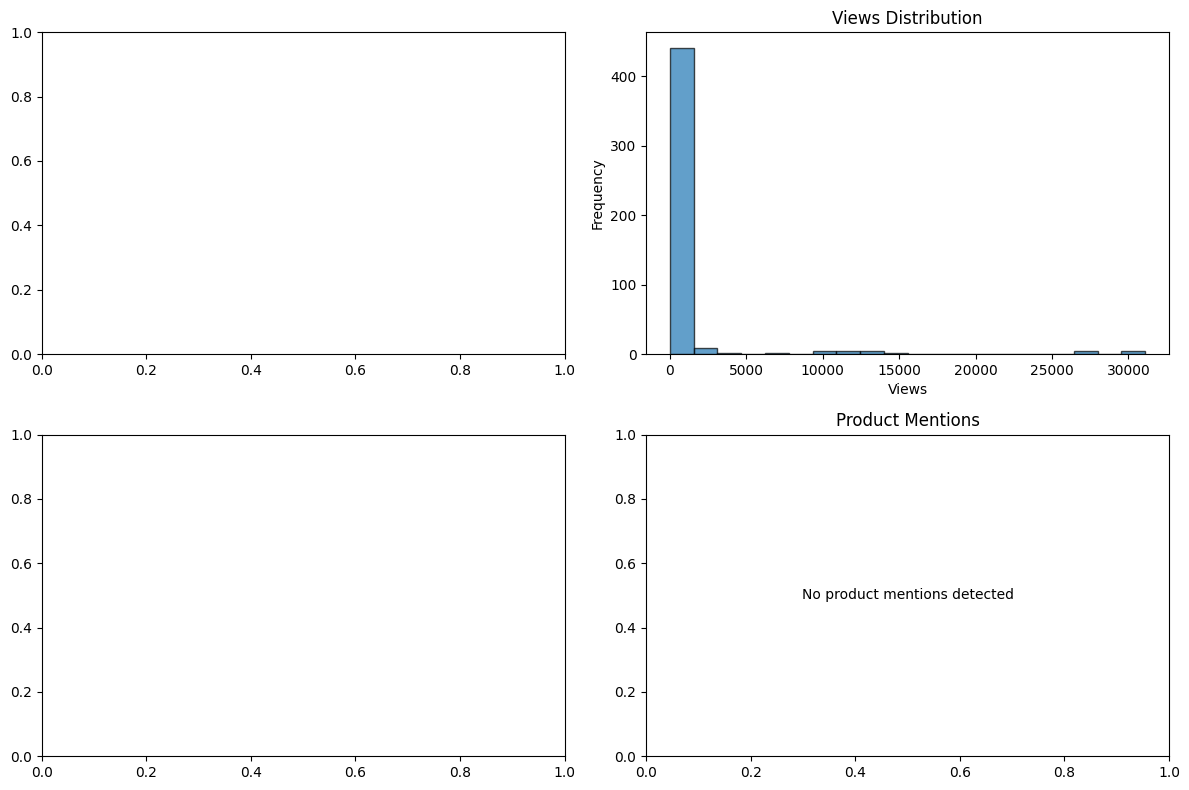

In [12]:
# CSV Data Analysis Notebook
# This notebook analyzes Telegram-like data from a CSV file

import json
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load CSV data
CSV_PATH = Path("../data/raw/telegram_messages/2026-01-16/telegram_messages.csv")  # replace with your actual CSV filename
print("1. Loading CSV data...")

try:
    df = pd.read_csv(CSV_PATH)
    print(f"✓ Loaded CSV data with {len(df)} rows and {len(df.columns)} columns")
except Exception as e:
    print(f"✗ Error loading CSV: {e}")
    raise

# 2. Ensure required columns exist (excluding message_date)
required_columns = [
    'message_id', 'message_text', 'views',
    'has_media', 'detected_products', 'message_length', 'contains_price'
]


# 3. Basic statistics
print("\n2. Basic statistics...")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")



# Views analysis
print(f"\nViews statistics:")
print(f"  Total views: {df['views'].sum()}")
print(f"  Average views: {df['views'].mean():.1f}")
print(f"  Maximum views: {df['views'].max()}")



# 4. Visualization
print("\n3. Creating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


# Views distribution
axes[0, 1].hist(df['views'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Views Distribution')
axes[0, 1].set_xlabel('Views')
axes[0, 1].set_ylabel('Frequency')


# Product mentions (if available)
if all_products:
    top_products = product_counts.head(5)
    axes[1, 1].bar(top_products.index, top_products.values, color='skyblue')
    axes[1, 1].set_title('Top 5 Product Mentions')
    axes[1, 1].set_xlabel('Product')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, 'No product mentions detected', ha='center', va='center')
    axes[1, 1].set_title('Product Mentions')

plt.tight_layout()
plt.savefig('csv_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'csv_analysis.png'")



print("✓ Sample analysis saved as 'csv_sample_analysis.json'")
print("\n" + "="*50)
print("CSV data analysis completed successfully!")
print("="*50)
